In [1]:
cd '/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/specialplots' 

/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/specialplots


In [2]:
import nbformat

In [3]:
def savepy(filename, source: str = None, cell_no: int = None):
    '''
    Save python file from string. Assumes the working directory is the root project folder.
    '''
    filename = filename + '.py'
    path = '../../python/'

    current_cell = get_ipython().execution_count
    
    if source is None:
        if cell_no is None:
            cell_no = current_cell - 2 # - 1 for 0-based -1 again for previous
            #raise Exception("need source or cell number.")
        # get cell source
        tmp = nbformat.read(path + 'Special-Figure-Dev.ipynb', as_version=4)
        cell = tmp.cells[cell_no]
        source = cell['source']
        
        # truncate source
        trunc_word = '#truncate'
        if trunc_word in source:
            source = source[:source.index(trunc_word)]
            
        # strip white space
        lines = source.splitlines()
        for i in range(len(lines)):
            lines[i] = lines[i].rstrip()
        source = '\n'.join(lines)
        
    with open(path + filename, 'w') as f:
        f.write(source)

In [4]:
# %load ../../python/imports.py
import numpy as np
import pandas as pd
import math
from itertools import combinations
from itertools import product
from sklearn.datasets import load_iris

# matplotlib specific
import matplotlib as mpl
import matplotlib.pyplot as plt

# For Special Topics
import ternary # requires install
from ternary.helpers import simplex_iterator
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from scipy import stats

# Made redundant in the text
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.dates as mdates
from matplotlib import font_manager

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
# Ternary Chapter

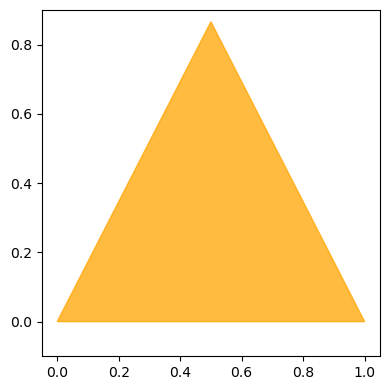

In [6]:
figure, tax = ternary.figure()# A tuple of plot objects
figure.set_size_inches(4,4)
tax.set_background_color('orange')
#truncate
plt.tight_layout()
plt.savefig("basic-ternary.pdf")

In [7]:
savepy('basic-ternary')

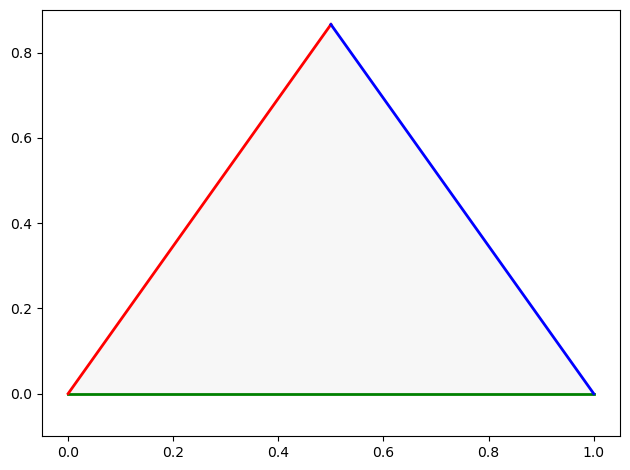

In [8]:
# Create the Plot
scale = 1 # length of the sides 
figure, tax = ternary.figure(scale=scale)

# Draw Boundary 
tax.boundary(linewidth= 2.0, 
             axes_colors = {'l':'red', 'r': 'blue', 'b': 'green'})
#truncate
plt.tight_layout()
plt.savefig("color-ternary.pdf")

In [9]:
savepy('color-ternary')

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


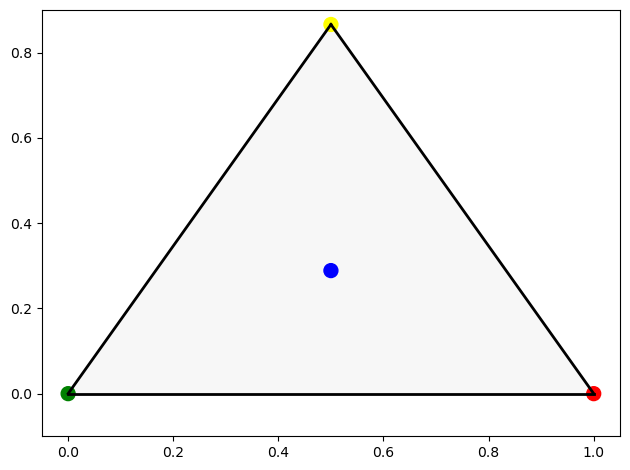

In [10]:
scale = 1
figure, tax = ternary.figure(scale=scale)

# Draw Boundary 
tax.boundary(linewidth= 2.0)

# Scatter Points
points = [(1,0,0), (0,1,0), (0,0,1), (1/3, 1/3, 1/3)]
tax.scatter(points,
            marker = 'o', 
            color = ['red', 'yellow', 'green', 'blue'],
            s = 100)
#truncate
plt.tight_layout()
plt.savefig("scatter-ternary.pdf")

In [11]:
savepy('scatter-ternary')

/Users/alclark/opt/anaconda3/lib/python3.9/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


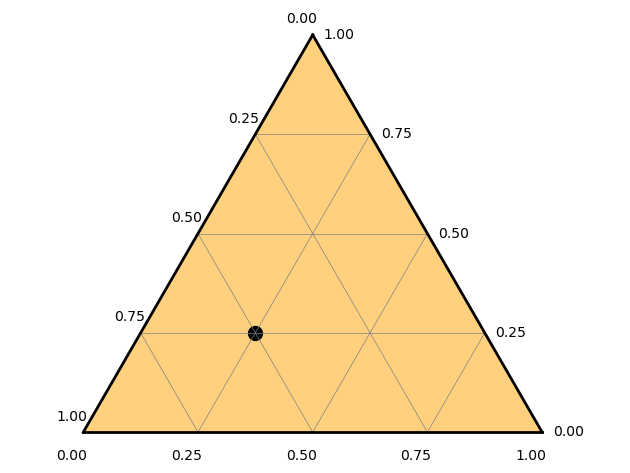

In [12]:
scale = 1
figure, tax = ternary.figure(scale=scale)
tax.set_background_color('orange', 
                         alpha = 0.5)

# Add ticks along the triangle edges
tax.ticks(axis = 'lbr', 
          multiple = .25, 
          tick_formats = '%.2f', 
          offset= 0.02, 
          linewidth = 0)

tax.gridlines(multiple = .25, 
              color = 'gray', 
              linewidth = 0.5, 
              linestyle = 'solid')

points = [(0.25, 0.25, 0.5)]
tax.scatter(points, 
            marker = 'o', 
            color = ['black'],
            s = 100)

tax.boundary(linewidth= 2.0)
tax.get_axes().axis('equal')
tax.get_axes().axis('off')
#truncate
plt.tight_layout()
plt.savefig("grid-ternary.pdf")

In [13]:
savepy('grid-ternary')

In [14]:
def winning_pct(p, action = 'rock'):
    
    """What is the net winning percentage given a choice of action and an opponent's strategy p, where p is a probability distribution over rock, paper, and scissors."""
    
    if action.lower() == 'rock':
        
        winning_pct = p[2] # pr win
        net = p[2] - p[1] # pr win - pr lose
    
    elif action.lower() == 'paper':
        
        winning_pct = p[0]
        net = p[0] - p[2]
        
    elif action.lower() == 'scissors':
        
        winning_pct = p[1]
        net = p[1] - p[0]
    else:
        raise ValueError("Input is not a valid action")

    return net

In [15]:
savepy('rps-helper')

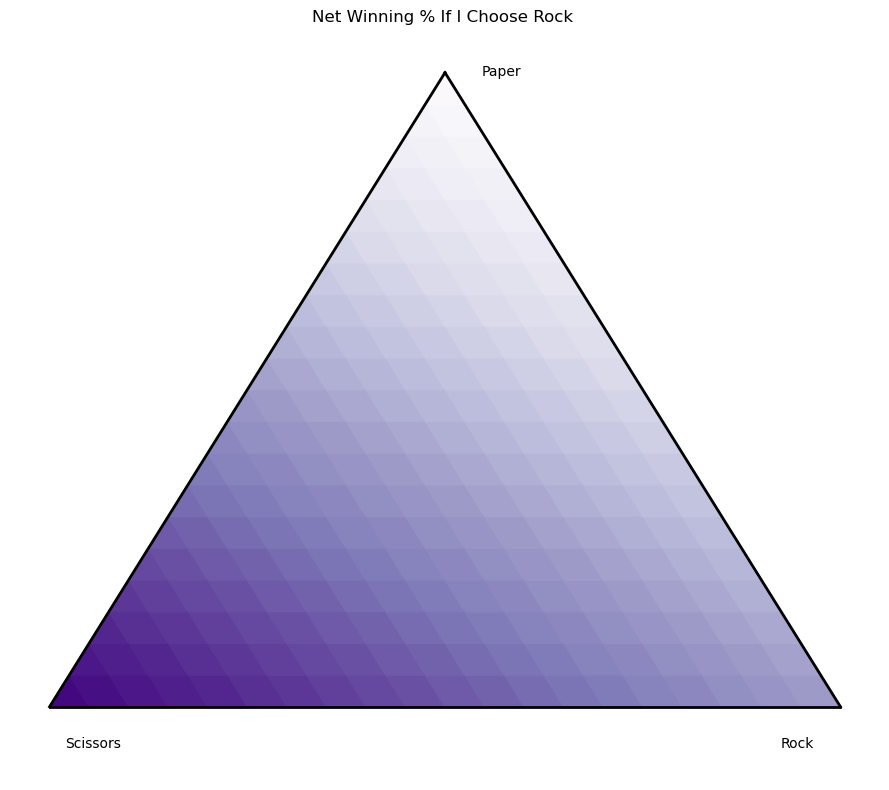

In [16]:
figure, tax = ternary.figure(scale = 20) 
# vary scale above for higher resolution
figure.set_size_inches(9, 8)

# Add Heatmap
tax.heatmapf(winning_pct, boundary=True, 
             style="triangular", 
             cmap = 'Purples', 
             colorbar = False)

tax.boundary(linewidth=2.0)

title = 'Net Winning % If I Choose Rock'
tax.set_title(title + " \n")

tax.right_corner_label('Rock', 
        position = (.88,0.05,.09), fontsize=10)
tax.top_corner_label('Paper', 
        position = (.01,1.11,.005),fontsize=10)
tax.left_corner_label('Scissors', 
        position = (.07,0.05,1), fontsize=10)

tax.get_axes().axis('off')
# Workaround for a bug with labels
tax._redraw_labels()
#truncate
plt.tight_layout()
plt.savefig('heat-rps.pdf')

In [17]:
savepy('heat-rps')

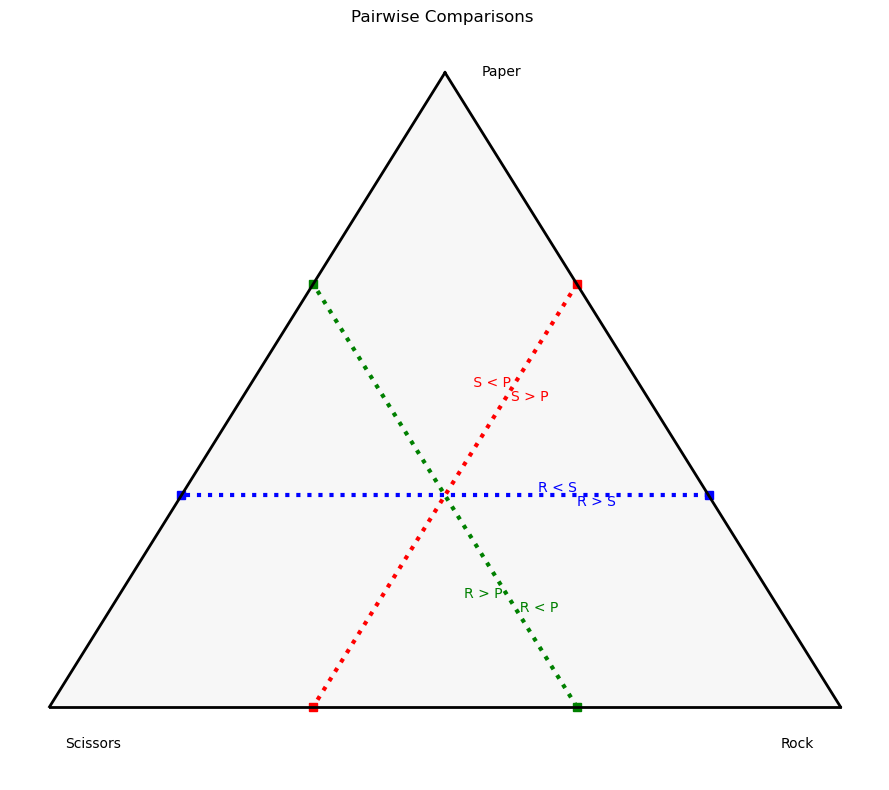

In [18]:
scale = 1
figure, tax = ternary.figure(scale = scale) 
# vary scale above for higher resolution
figure.set_size_inches(9, 8)

# Rock > Paper
# s - p > r - s
# 2s > r + p
p1 = (2/3, 0, 1/3) # rps ordering
p1 = scale * np.array(p1)
p2 = (0, 2/3, 1/3)
p2 = scale * np.array(p2)

tax.line(p1, p2,
         linewidth=3.,
         marker='s',
         color='green',
         linestyle=":")
tax.annotate('  R < P', (.75*p1 + .25*p2),
             color = 'green',
             ha = 'left',
             va = 'top')
tax.annotate('R > P  ', (.75*p1 + .25*p2),
             color = 'green',
             ha = 'right',
             va= 'bottom')

# Rock > Scissors
# s - p > p - r
# s + r > 2p
p1 = (2/3, 1/3, 0) # rps ordering
p1 = scale * np.array(p1)
p2 = (0, 1/3, 2/3)
p2 = scale * np.array(p2)

tax.line(p1, p2,
         linewidth = 3.,
         marker = 's',
         color = 'blue',
         linestyle = ":",
         label = 'RockScissors')
tax.annotate('R > S', (.75*p1 + .25*p2),
             color = 'blue',
             ha = 'left',
             va = 'top')
tax.annotate('R < S', (.75*p1 + .25*p2),
             color = 'blue',
             ha = 'right',
             va= 'bottom')

# Paper > Scissors
# r - s > p - r
# 2r > p + s
p1 = (1/3, 2/3, 0) # rps ordering
p1 = scale * np.array(p1)
p2 = (1/3, 0, 2/3)
p2 = scale * np.array(p2)

tax.line(p1, p2,
         linewidth = 3,
         marker = 's',
         color = 'red',
         linestyle = ":")


tax.annotate('S > P ', (.75*p1 + .25*p2),
             color = 'red',
             ha = 'left',
             va = 'top')
tax.annotate(' S < P', (.75*p1 + .25*p2),
             color = 'red',
             ha = 'right',
             va= 'bottom')

tax.boundary(linewidth=2.0)

# Make pretty as desired
title = 'Pairwise Comparisons'
tax.set_title(title + " \n")

tax.right_corner_label('Rock', 
                       position = (.88,0.05,.09),
                       fontsize=10)
tax.top_corner_label('Paper', 
                     position = (.01,1.11,.005),
                     fontsize=10)
tax.left_corner_label('Scissors', 
                      position = (.07,0.05,1),
                      fontsize=10)

tax.get_axes().axis('off')
tax._redraw_labels()
#truncate
plt.tight_layout()
plt.savefig("rps-br-lines.pdf")

In [19]:
savepy('rps-br-lines')

In [20]:
def color_point(x, y, z):
    """Given an opponent plays rock at chance x, paper at y, and scissors at z, what is the best response?
    Best responses are mapped to RGB colors."""

    # winning pcts for possible responses
    rock_net = z - y
    paper_net = x - z
    scissors_net = y - x
    
    # get best response as highest net winning pct
    list_  = [rock_net, paper_net, scissors_net]
    best = list_.index(max(list_))

    # map into RGB color weights
    colors = [0, 0, 0]
    colors[best] = 1 

    # return RGB tuple with fourth value for opacity (alpha) 
    return (*tuple(colors), 1.)

In [21]:
savepy('rps-br-helper')

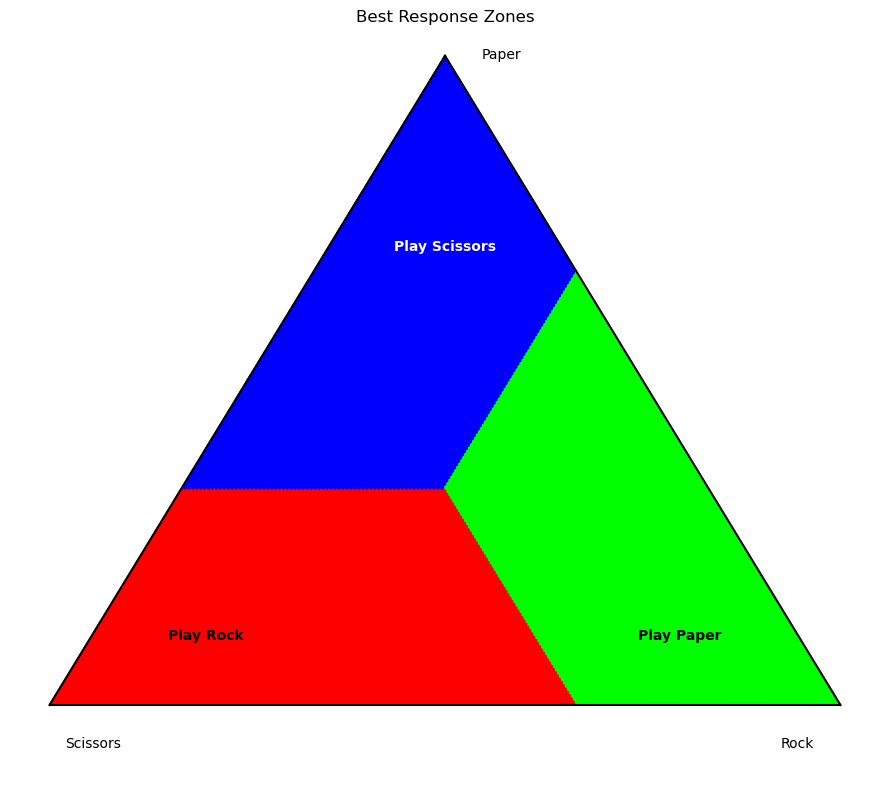

In [22]:
# Adapted from https://github.com/marcharper/python-ternary/blob/master/README.md RGBA section
def generate_heatmap_data(scale=10):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(i, j, k)
    return d

# Scale should be chosen high enough for sharp resolution
scale = 200
data = generate_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(9, 8)

tax.heatmap(data, style="hexagonal", 
    use_rgba=True, colorbar = False)
tax.boundary()
tax.set_title("Best Response Zones")


# Label the corners
labels = 'Rock', 'Paper', 'Scissors' 
tax.right_corner_label(labels[0], 
    position = (.88,0.05,.09), fontsize=10)
tax.top_corner_label(labels[1],
    position = (.01,1.11,.005),fontsize=10)
tax.left_corner_label(labels[2], 
    position = (.07,0.05,1), fontsize=10)

# Label best response zones
tax.annotate("Play Rock", 
    (.1* scale,.1 * scale,.8 * scale), weight = 'bold')
tax.annotate("Play Paper", 
    (.8*scale, .1*scale, .1*scale), ha = 'right',  weight = 'bold')
tax.annotate("Play Scissors", 
    (.15*scale, .7*scale, .15*scale), ha = 'center', 
    color = 'white',  weight = 'bold')

# Clear background and axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax._redraw_labels()
#truncate
plt.tight_layout()
plt.savefig("rps-br-zones.pdf")

In [23]:
savepy('rps-br-zones')

In [24]:
# MDS

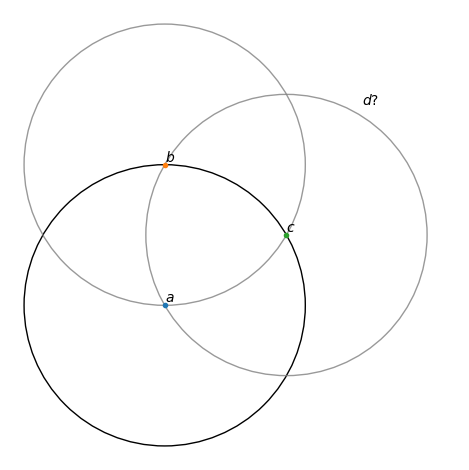

In [25]:
white = colorConverter.to_rgba('white', alpha = 0)
grey = colorConverter.to_rgba('gray', alpha = 0.8)

fig, ax = plt.figure(), plt.axes()

# point a
c = plt.Circle((0, 0), radius = 1, facecolor = white, edgecolor = 'black', alpha = 1)
ax.add_artist(c)
ax.plot([0],[0], marker = 'o', markersize = 3)
ax.text(0,0,'$a$', va = 'bottom', ha = 'left')

# point b
c = plt.Circle((0, 1), radius = 1, facecolor = white, edgecolor = grey)
ax.add_artist(c)
ax.plot([0],[1], marker = 'o', markersize = 3)
ax.text(0,1,'$b$', va = 'bottom', ha = 'left')

# Add point c
angle = math.asin(0.5)
c1 = math.cos(angle)
c2 = math.sin(angle)
ax.plot([c1],[c2], marker = 'o', markersize = 3)
ax.text(c1,c2,'$c$', va = 'bottom', ha = 'left')# = 1)
c = plt.Circle((c1, c2), radius = 1, facecolor = white, edgecolor = grey)
ax.add_artist(c)

# Where does d go? 
ax.text(1.4,1.4,'$d$?', va = 'bottom', ha = 'left')

ax.axis('off')
ax.set_aspect('equal')

v = 2.1
ax.set_xlim([-1.1,v])
ax.set_ylim([-1.1,v])
#truncate
plt.tight_layout()
plt.savefig("mds-circles.pdf")

In [26]:
savepy('mds-circles')

In [27]:
# add MDS_social.pdf code

In [28]:
# Stats Chapter

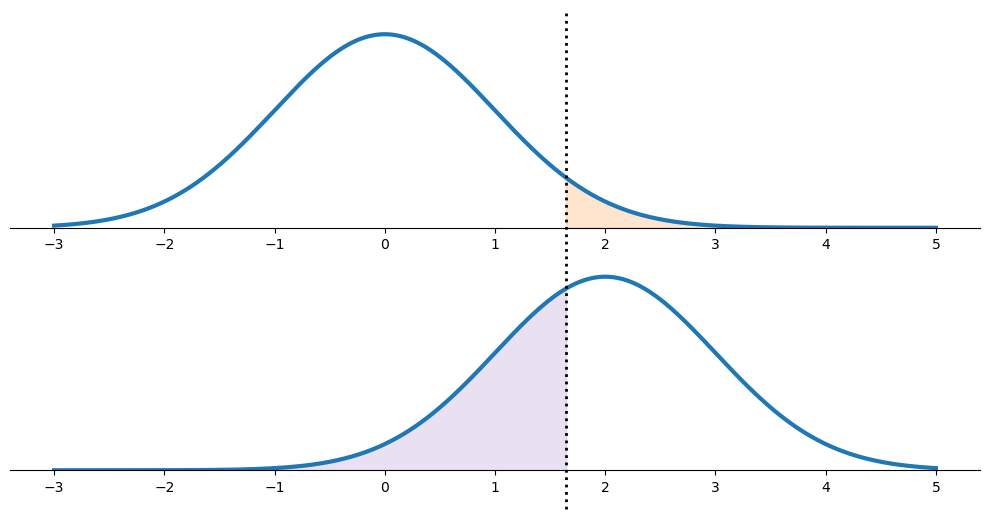

In [29]:
x = np.linspace(-3,5, 100_000)

fig = plt.figure(figsize = (10,5))
ax0 = fig.add_subplot(211, zorder = 99)
ax1 = fig.add_subplot(212)

for center, ax in zip([0, 2], [ax0, ax1]):
  # add normal curve
    norm_pdf = stats.norm.pdf(x, center, 1)
    ax.plot(x, norm_pdf, lw = 3)

    # Clean plot
    for s in 'left', 'right', 'top':
        ax.spines[s].set_visible(False)
    ax.yaxis.set_ticks([])
    ax.set_ylim(0, .42)

# draw rejection region
ax = ax0
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha) # for one-sided
rejection_x = x[x > critical_value]
ax.fill_between(rejection_x,
                stats.norm.pdf(x, 0, 1)[-len(rejection_x):],
                color = 'C1',
                alpha = 0.2)

# Draw critical value line through both plots
trans = mpl.transforms.blended_transform_factory(ax.transData, fig.transFigure)
ax.plot([critical_value, critical_value],
        [0, 1],
        color='black',
        linestyle = 'dotted',
        lw=2,
        transform = trans,
        clip_on= False,
        zorder = 99)

# Draw type II error region
fail_to_reject_region = x[x <= critical_value]
ax1.fill_between(fail_to_reject_region,
                 stats.norm.pdf(x, 2, 1)[0:len(fail_to_reject_region)],
                 color = 'C4',
                 alpha = 0.2)
#truncate
plt.tight_layout()
plt.savefig("errors-stacked.pdf")

In [30]:
## probability theory

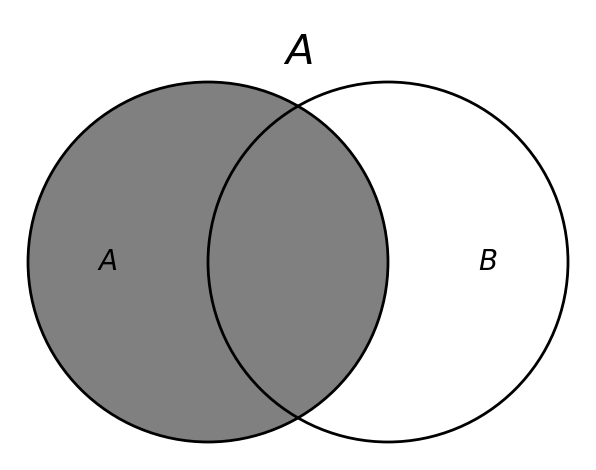

In [31]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(1)
ax.set_xlim(-1.6,1.6)
ax.set_ylim(-1.1,1.4)
ax.axis('off')

# Add circles with color fill
left_circle = plt.Circle((-0.5, 0), 1,
                        edgecolor = 'black',
                        facecolor = 'gray',
                        linewidth = 2)
right_circle = plt.Circle((0.5, 0), 1,
                        edgecolor = 'black',
                        facecolor = (1, 1, 1, 0), # transparent
                        linewidth = 2,
                        zorder = 5)
ax.add_artist(left_circle)
ax.add_artist(right_circle)

# Labels
ax.text(0, 1.05,
       s = r"$A$",
       va = 'bottom',
       ha = 'center',
       size = 30)
ax.text(-1, 0,
       s = r'$A$',
       ha = 'right',
       va = 'center',
       size = 20)
ax.text(1, 0,
       s = r'$B$',
       ha = 'left',
       va = 'center',
       size = 20)
#truncate
plt.tight_layout()
plt.savefig("event-A.pdf")

In [32]:
savepy('event-A')

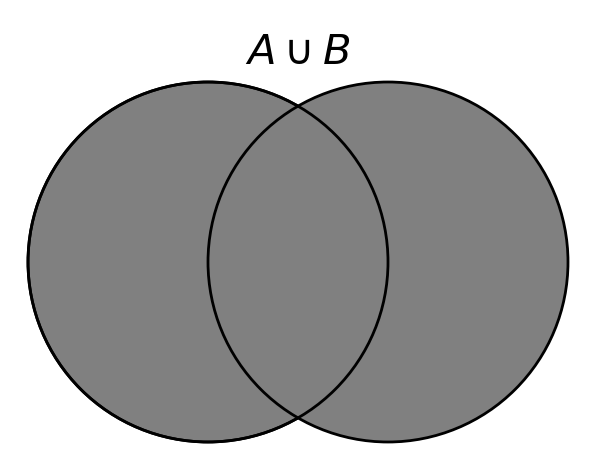

In [33]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(1)
ax.set_xlim(-1.6,1.6)
ax.set_ylim(-1.1,1.4)
ax.axis('off')

# Add circles with color fill
left_circle = plt.Circle((-0.5, 0), 1,
                        edgecolor = 'black',
                        facecolor = 'gray',
                        linewidth = 2)
left_circle_helper = plt.Circle((-0.5, 0), 1,
                        edgecolor = 'black',
                        facecolor = (1, 1, 1, 0),
                        linewidth = 2)
right_circle = plt.Circle((0.5, 0), 1,
                        edgecolor = 'black',
                        facecolor = 'gray',
                        linewidth = 2)
ax.add_artist(left_circle)
ax.add_artist(right_circle)
ax.add_artist(left_circle_helper)

# Label
ax.text(0, 1.05,
       s = r"$A \cup B$",
       va = 'bottom',
       ha = 'center',
       size = 30)
#truncate
plt.tight_layout()
plt.savefig("union.pdf")

In [34]:
savepy("union")

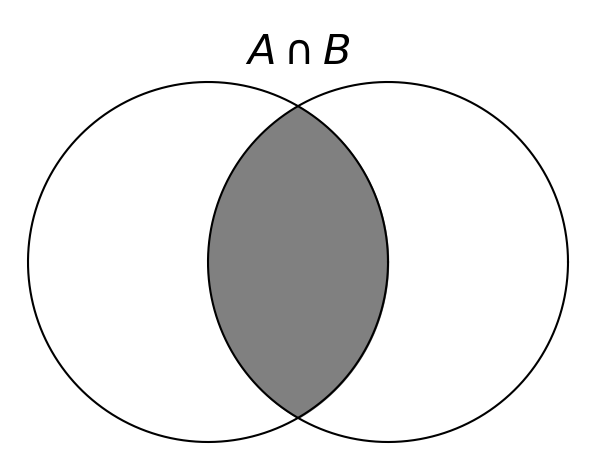

In [35]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(1)
ax.set_xlim(-1.6,1.6)
ax.set_ylim(-1.1,1.4)
ax.axis('off')

# Add Circles
k = 10_000
angles = np.linspace(0, 2*np.pi, k)
x = np.cos(angles)
y = np.sin(angles)
ax.plot(x - 0.5, y, color = 'black')
ax.plot(x + 0.5, y, color = 'black')

# fill circles in two pieces 
x = np.cos(angles) - 0.5
t = 0 
while x[t] > 0:
    t += 1
ax.fill_between(x[:t], -y[0:t], y[0:t],
                color = 'gray', zorder = -1)
ax.fill_between(-x[:t] , -y[0:t], y[0:t],
                color = 'gray', zorder = -1)

# Label
ax.text(0, 1.05,
       s = r"$A \cap B$",
       va = 'bottom',
       ha = 'center',
       size = 30)
#truncate
plt.tight_layout()
plt.savefig("intersection.pdf")

In [36]:
savepy('intersection')

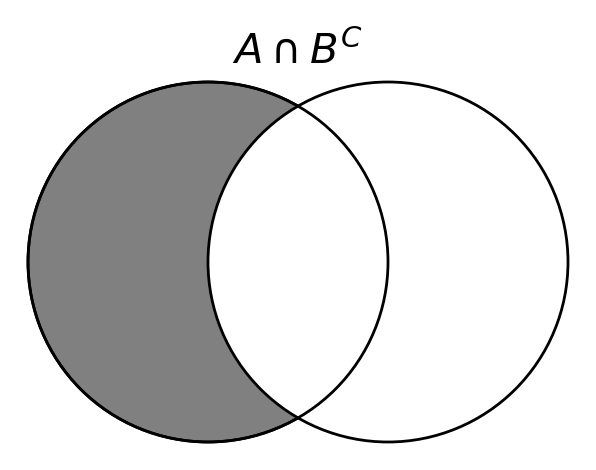

In [37]:
fig, ax = plt.figure(edgecolor = 'black'), plt.axes()
ax.set_aspect(1)
ax.set_xlim(-1.6,1.6)
ax.set_ylim(-1.1,1.4)
ax.axis('off')

# Add circles with color fill
left_circle = plt.Circle((-0.5, 0), 1,
                        edgecolor = 'black',
                        facecolor = 'gray',
                        linewidth = 2)
left_circle_helper = plt.Circle((-0.5, 0), 1,
                        edgecolor = 'black',
                        facecolor = (1,1,1,0),
                        linewidth = 2)
right_circle = plt.Circle((0.5, 0), 1,
                        edgecolor = 'black',
                        facecolor = 'white',
                        linewidth = 2)
ax.add_artist(left_circle)
ax.add_artist(right_circle)
ax.add_artist(left_circle_helper)

# Label
ax.text(0, 1.05,
       s = r"$A \cap B^C$",
       va = 'bottom',
       ha = 'center',
       size = 30)
#truncate
plt.tight_layout()
plt.savefig("A-minus-B.pdf")

In [38]:
savepy('A-minus-B')

In [39]:
## distributions

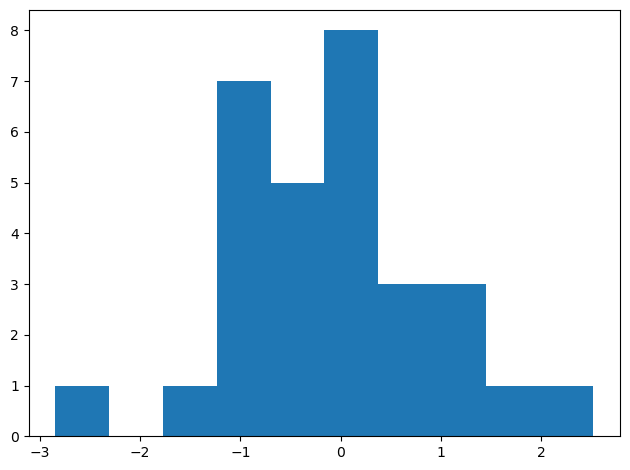

In [40]:
data = np.random.normal(size = 30)
fig, ax = plt.figure(), plt.axes()
ax.hist(data)
#truncate
plt.tight_layout()
plt.savefig('default-hist.pdf')

In [41]:
savepy('default-hist')

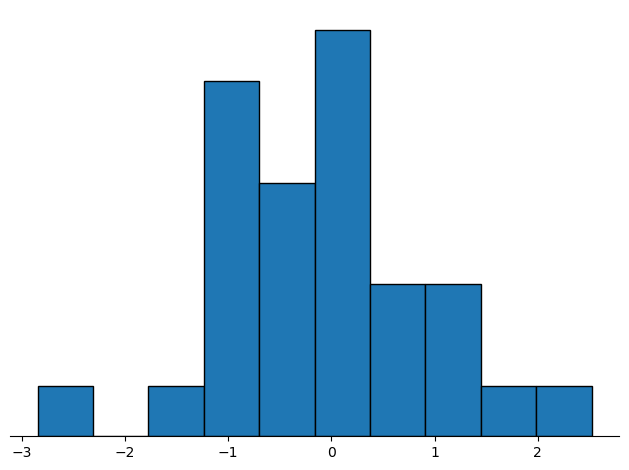

In [42]:
#data = np.random.normal(size = 30)
fig, ax = plt.figure(), plt.axes()
ax.hist(data, edgecolor = 'black')
ax.set_yticks([])
for s in 'left', 'top', 'right':
    ax.spines[s].set_visible(False)
#truncate
plt.tight_layout()
plt.savefig('clean-hist.pdf')

In [43]:
savepy('clean-hist')

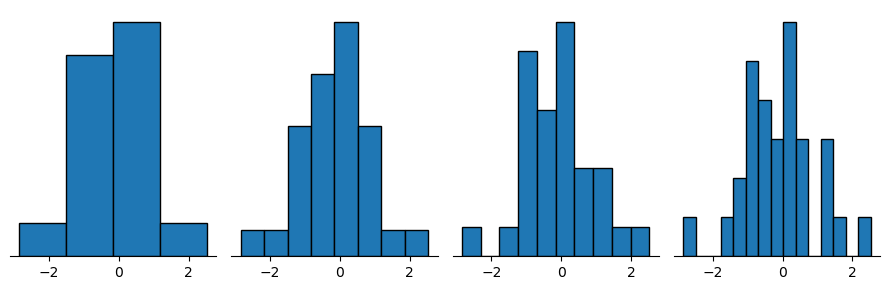

In [44]:
#data = np.random.normal(size = 30)
fig, ax = plt.subplots(1,4, figsize = (9,3))

for key, b in enumerate([4, 8, 10, 15]):
    ax[key].hist(data, edgecolor = 'black', bins = b)
    ax[key].set_yticks([])
    for s in 'left', 'top', 'right':
        ax[key].spines[s].set_visible(False)
#truncate
plt.tight_layout()
plt.savefig('bins-hist.pdf')

In [45]:
savepy('bins-hist')

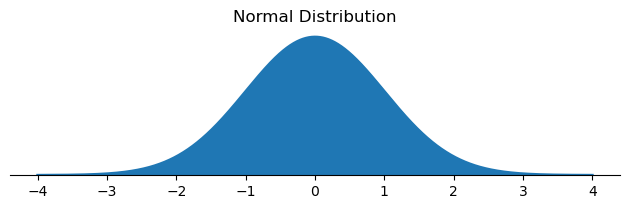

In [46]:
x = np.linspace(-4, 4, 100_000)
y = stats.norm.pdf(x)
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(5)

ax.plot(x,y, linewidth = 2, color = 'C0')
ax.fill_between(x,y, color = 'C0')

ax.set_yticks([])
for s in 'left', 'top', 'right':
    ax.spines[s].set_visible(False)
    
ylims = ax.get_ylim()
ax.set_ylim(0, ylims[1])
ax.set_title("Normal Distribution")
#truncate
plt.tight_layout()
plt.savefig("normal-pdf.pdf")

In [47]:
savepy('normal-pdf')